In [1]:
import matplotlib.pyplot as plt
import cv2

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/0.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

dog = cv2.imread('CATS_DOGS/train/DOG/1.jpg')
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

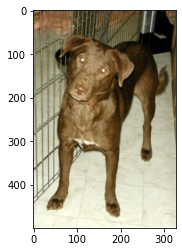

In [3]:
plt.imshow(dog)

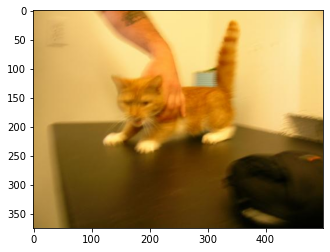

In [4]:
plt.imshow(cat4)

In [5]:
cat4.shape

(375, 500, 3)

In [6]:
dog.shape

(500, 327, 3)

## Prepare the data

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
image_gen =  ImageDataGenerator(rotation_range=30,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rescale=1/255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

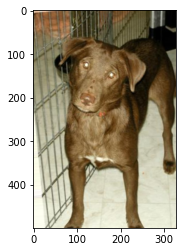

In [9]:
plt.imshow(image_gen.random_transform(dog))

In [12]:
image_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [13]:
input_shape = (150,150,3)

## Build model

In [16]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Conv2D,MaxPooling2D,Dense

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [35]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train/',
                                               target_size=input_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [36]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test/',
                                              target_size=input_shape[:2],
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 6251 images belonging to 2 classes.


In [37]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [42]:
import warnings
warnings.filterwarnings('ignore')

results = model.fit(train_image_gen,epochs=100,steps_per_epoch=150,
                             validation_data=test_image_gen,validation_steps=12)

150/150 [==============================] - 36s 237ms/step - loss: 0.6903 - accuracy: 0.5304 - val_loss: 0.6840 - val_accuracy: 0.4896


In [44]:
results.history['accuracy']

[0.5304166674613953]

In [45]:
# plt.plot(results.history['accuracy'])

In [46]:
from keras.models import load_model

In [48]:
dog_file = 'CATS_DOGS/test/DOG/10000.jpg'

In [49]:
from keras.preprocessing import image

In [50]:
dog_img = image.load_img(dog_file,target_size=(150,150))

In [51]:
dog_img = image.img_to_array(dog_img)

In [52]:
dog_img.shape

(150, 150, 3)

In [53]:
import numpy as np

In [54]:
dog_img = np.expand_dims(dog_img,axis=0)

In [55]:
dog_img.shape

(1, 150, 150, 3)

In [56]:
dog_img = dog_img/255

In [64]:
model.predict_classes(dog_img)

array([[1]], dtype=int32)

In [63]:
model.predict(dog_img)

array([[0.50412416]], dtype=float32)